# Entregable 1 - Data Preparation

#### **Nombre**: Santiago Ezequiel Velasco
#### **Fecha**: 23/11/2024

# Índice


1. ### [Importación de Librerías y Análisis del DataFrame](#1)

2. ### [Eliminación de Duplicados](#2)

3. ### [Gestión de Valores Nulos](#3)

4. ### [Creación de Nuevas Variables](#4)

5. ### [Formateado de Variables](#5)

6. ### [Análisis de Variables](#6)

7. ### [Análisis de la Variable Objetivo](#7)

8. ### [Análisis de Correlación](#8)

9. ### [Transformación de categóricas a numéricas](#9)

10. ### [Análisis de Correlación Final](#10)

_________________________________________________________________________________________________________

<a id="1"></a>
### Importación de Librerías y Análisis del DataFrame

In [2]:
# *librerías*
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder


In [3]:
df=pd.read_csv("bmw_pricing_v3.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [5]:
df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [6]:
df.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [7]:
df.shape

(4843, 18)

In [8]:
df_ED=df.copy()

_________________________________________________________________________________________________________

<a id="2"></a>
### Eliminación de Duplicados

In [9]:
df_ED[df_ED.duplicated(keep=False)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


*El dataframe no cuenta con valores duplicados*

In [10]:
df_GVN=df_ED.copy()

_________________________________________________________________________________________________________

<a id="3"></a>
### Gestión de Valores Nulos

In [11]:
df_GVN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [12]:
df_GVN.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

#### Marca

In [13]:
df_GVN["marca"].value_counts()

marca
BMW    3873
Name: count, dtype: int64

In [14]:
df_GVN["marca"].fillna("BMW",inplace=True)

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\448220844.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_GVN["marca"].fillna("BMW",inplace=True)


In [15]:
df_GVN["marca"].value_counts()

marca
BMW    4843
Name: count, dtype: int64

*Operacion Realizada: Se completa con la marca BMW todos los valores nulos*

#### Modelo

In [16]:
df_GVN["modelo"].value_counts()

modelo
320                  752
520                  633
318                  568
X3                   438
116                  358
                    ... 
216                    1
220 Active Tourer      1
 Active Tourer         1
225 Active Tourer      1
214 Gran Tourer        1
Name: count, Length: 76, dtype: int64

In [17]:
df_GVN[df_GVN["modelo"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,BMW,NaN,146338.0,105.0,NaN,diesel,black,NaN,False,True,False,NaN,False,NaN,True,NaN,13300.0,2018-08-01
4766,BMW,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,NaN,True,False,True,False,14900.0,2018-09-01
4802,BMW,NaN,118640.0,110.0,NaN,diesel,white,NaN,False,False,False,NaN,False,False,False,False,800.0,2018-03-01


In [18]:
df_GVN["modelo"][(df_GVN["potencia"]==105) & (df_GVN["tipo_gasolina"]=="diesel") & (df_GVN["tipo_coche"]=="suv")].value_counts(dropna=False)

modelo
X1     69
X3     16
NaN     1
Name: count, dtype: int64

*No hay un solo tipo de modelo que cumpla con esas caracteristicas, por lo que no puedo asumir que el registro 4766 que sea un modelo "X1" o "X3"*

In [19]:
df_GVN.dropna(subset=["modelo"],inplace=True)

*Operacion realizada: se eliminan los valores nulos*

#### KM

In [20]:
df_GVN[df_GVN['km'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
459,BMW,520,NaN,135.0,2012-12-01,diesel,black,NaN,True,True,True,False,True,True,True,True,20300.0,2018-02-01
4811,BMW,X3,NaN,190.0,NaN,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01


In [21]:
km_media=df_GVN["km"].mean()

In [22]:
km_media

np.float64(140968.09818106657)

In [23]:
df_GVN["km"].fillna(km_media,inplace=True)

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\716049064.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_GVN["km"].fillna(km_media,inplace=True)


In [24]:
df_GVN.loc[459]

marca                                    BMW
modelo                                   520
km                             140968.098181
potencia                               135.0
fecha_registro                    2012-12-01
tipo_gasolina                         diesel
color                                  black
tipo_coche                               NaN
volante_regulable                       True
aire_acondicionado                      True
camara_trasera                          True
asientos_traseros_plegables            False
elevalunas_electrico                    True
bluetooth                               True
gps                                     True
alerta_lim_velocidad                    True
precio                               20300.0
fecha_venta                       2018-02-01
Name: 459, dtype: object

*Operacion realizada: se coloca la media de km para los dos registros nulos encontrados*

#### Potencia

In [25]:
df_GVN[df_GVN['potencia'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
181,BMW,525,106054.0,NaN,2014-05-01,diesel,black,estate,False,True,False,NaN,False,False,True,True,18700.0,2018-03-01


In [26]:
df_GVN[(df_GVN['modelo']=="525")&
       (df_GVN["tipo_gasolina"]=="diesel")&
       (df_GVN["tipo_coche"]=="estate")&
       (df_GVN["volante_regulable"]==False)&
       (df_GVN["aire_acondicionado"]==True)&
       (df_GVN["elevalunas_electrico"]==False)&
       (df_GVN["bluetooth"]==False)&
       (df_GVN["gps"]==True)&
       (df_GVN["alerta_lim_velocidad"]==True)]["potencia"].value_counts()

potencia
160.0    3
Name: count, dtype: int64

In [27]:
df_GVN['potencia'].fillna(160,inplace=True)

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\3622694027.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_GVN['potencia'].fillna(160,inplace=True)


In [28]:

df_GVN.loc[181]

marca                                 BMW
modelo                                525
km                               106054.0
potencia                            160.0
fecha_registro                 2014-05-01
tipo_gasolina                      diesel
color                               black
tipo_coche                         estate
volante_regulable                   False
aire_acondicionado                   True
camara_trasera                      False
asientos_traseros_plegables           NaN
elevalunas_electrico                False
bluetooth                           False
gps                                  True
alerta_lim_velocidad                 True
precio                            18700.0
fecha_venta                    2018-03-01
Name: 181, dtype: object

*Operacion realiazada: Al unico registro unico se le asigna la misma potencia que tienen los autos cuyo modelo y caracteristicas son iguales*

#### Fecha Registro

In [29]:
df_GVN[df_GVN['fecha_registro'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
6,BMW,325,205219.0,145.0,NaN,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
8,BMW,Z4,123886.0,125.0,NaN,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4834,BMW,218 Gran Tourer,47782.0,110.0,NaN,diesel,blue,NaN,False,NaN,False,NaN,False,False,True,True,14900.0,2018-07-01
4835,BMW,218 Active Tourer,165707.0,110.0,NaN,diesel,black,van,False,True,False,NaN,False,NaN,True,True,13600.0,2018-07-01
4837,BMW,218 Gran Tourer,66770.0,110.0,NaN,diesel,blue,van,False,True,False,NaN,False,False,True,False,13400.0,2018-07-01
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01


Inicio: Evaluación intermedia si justificaria quedarme solo con los valores no nulos, recortando casi la mitad del dataframe

In [30]:
df_GVN2=df_GVN.copy()

In [31]:
df_GVN2

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


In [32]:
df_GVN2.dropna(subset=['fecha_registro'],inplace=True)

In [33]:
df_GVN2.dropna(subset=['fecha_venta'],inplace=True)

In [34]:
df_GVN2['fecha_venta'] = pd.to_datetime(df_GVN2['fecha_venta'])
df_GVN2['fecha_registro'] = pd.to_datetime(df_GVN2['fecha_registro'])

In [35]:
df_GVN2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2419 entries, 0 to 4841
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        2419 non-null   object        
 1   modelo                       2419 non-null   object        
 2   km                           2419 non-null   float64       
 3   potencia                     2419 non-null   float64       
 4   fecha_registro               2419 non-null   datetime64[ns]
 5   tipo_gasolina                2416 non-null   object        
 6   color                        2195 non-null   object        
 7   tipo_coche                   1680 non-null   object        
 8   volante_regulable            2416 non-null   object        
 9   aire_acondicionado           2165 non-null   object        
 10  camara_trasera               2418 non-null   object        
 11  asientos_traseros_plegables  724 non-null    obj

In [36]:
df_GVN2['antiguedad'] = (df_GVN2['fecha_venta'] - df_GVN2['fecha_registro']).dt.days / 365.25


In [37]:
df_GVN2.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antiguedad
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,5.916496
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,5.837098
5,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01,6.757016
7,BMW,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,NaN,False,True,True,False,6100.0,2018-02-01,8.503765
12,BMW,420,132025.0,135.0,2014-03-01,diesel,blue,NaN,True,NaN,False,False,True,True,True,NaN,21700.0,2018-03-01,4.000000


<Axes: xlabel='antiguedad', ylabel='precio'>

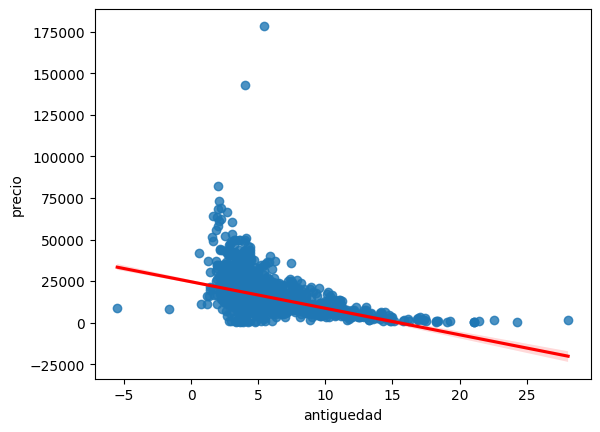

In [38]:
sns.regplot(data=df_GVN2, x="antiguedad", y="precio",line_kws={'color': 'red'}) 


In [39]:
corr = df_GVN2.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,gps,precio,antiguedad
km,1.000000,-0.036463,0.171413,-0.398143,0.474947
potencia,-0.036463,1.000000,0.003068,0.605792,-0.095636
gps,0.171413,0.003068,1.000000,-0.011859,0.082390
precio,-0.398143,0.605792,-0.011859,1.000000,-0.419166
antiguedad,0.474947,-0.095636,0.082390,-0.419166,1.000000


Conclusión: si bien la variable antigüedad y precio tienen una gran correlación como seria logico, no llega a ser la suficiente para que justifique eliminar casi la mitad del dataframe

Fin: Evaluación intermedia si justificaria quedarme solo con los valores no nulos, recortando casi la mitad del dataframe

Continuación DataFrame Principal

In [40]:
del(df_GVN['fecha_registro'])

*Operacion realizada: al ser una variable, donde casi la mitad de sus valores son nulos cualquier tipo de asignacion a esta variable podria afectar al modelo, por lo que se deside quitarla y no tenerla en cuenta*

#### Tipo Gasolina               

In [41]:
df_GVN[df_GVN['tipo_gasolina'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,BMW,420,54993.0,135.0,NaN,black,NaN,False,False,False,False,False,False,False,False,18400.0,2018-03-01
185,BMW,320,186697.0,135.0,NaN,white,estate,False,False,False,NaN,False,False,False,True,2400.0,2018-04-01
444,BMW,318,111622.0,100.0,NaN,black,estate,True,True,False,NaN,False,False,True,True,15400.0,2018-02-01
480,BMW,318,170350.0,105.0,NaN,white,NaN,False,True,False,NaN,False,False,True,False,10200.0,2018-02-01
630,BMW,318,147558.0,105.0,NaN,white,estate,False,NaN,False,NaN,False,False,False,True,100.0,2018-03-01


In [42]:
df_GVN['tipo_gasolina'].value_counts()

tipo_gasolina
diesel           4628
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

In [43]:
print(df_GVN[df_GVN['tipo_gasolina']=="diesel"][['tipo_gasolina']].count() / df_GVN['tipo_gasolina'].count()*100)

tipo_gasolina    95.718718
dtype: float64


In [44]:
df_GVN['tipo_gasolina'].fillna("diesel",inplace=True)

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\3038961382.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_GVN['tipo_gasolina'].fillna("diesel",inplace=True)


In [45]:
df_GVN['tipo_gasolina'].value_counts()

tipo_gasolina
diesel           4633
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

In [46]:
df_GVN['tipo_gasolina'].value_counts()

tipo_gasolina
diesel           4633
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

*Operación realizada: al ser los 96% de los registros de tipo "diesel" se asume que los 5 valores faltantes como diesel tambien.*

#### Color     

In [47]:
df_GVN['color'].value_counts()

color
black     1498
grey      1070
blue       647
white      483
brown      302
silver     291
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

In [48]:
df_GVN[df_GVN['color'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
14,BMW,120,174631.0,120.0,diesel,NaN,convertible,True,True,False,False,False,False,True,False,10500.0,2018-04-01
18,BMW,325,205474.0,145.0,diesel,NaN,NaN,True,True,False,NaN,True,NaN,True,NaN,11000.0,2018-04-01
25,BMW,318,196092.0,85.0,petrol,NaN,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01
36,BMW,318,187294.0,105.0,petrol,NaN,convertible,True,False,False,False,False,True,True,NaN,2400.0,2018-06-01
47,BMW,420,20996.0,135.0,petrol,NaN,coupe,True,False,False,NaN,True,False,True,False,21400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4757,BMW,X4,61989.0,140.0,diesel,NaN,NaN,False,False,False,NaN,False,NaN,False,True,28600.0,2018-09-01
4777,BMW,X5,285669.0,173.0,diesel,NaN,NaN,True,True,False,NaN,True,False,True,True,9300.0,2018-09-01
4805,BMW,218 Active Tourer,35382.0,110.0,diesel,NaN,van,False,NaN,False,NaN,False,NaN,True,True,13100.0,2018-02-01
4818,BMW,X3,110039.0,130.0,diesel,NaN,NaN,False,NaN,False,NaN,False,False,True,False,1300.0,2018-05-01


In [49]:
df_GVN['color'].fillna("Sin Informacion",inplace=True)

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\3710381048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_GVN['color'].fillna("Sin Informacion",inplace=True)


*Operación Realizada: Se agrega la categoria: "Sin Informacion", para todos aquellos valores nulos*

#### Tipo Coche

In [50]:
df_GVN['tipo_coche'].value_counts()

tipo_coche
estate         1107
sedan           821
suv             754
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

In [51]:
df_GVN[df_GVN['tipo_coche'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
2,BMW,320,183297.0,120.0,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
4,BMW,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,BMW,335,152352.0,225.0,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
11,BMW,325,228000.0,145.0,diesel,black,NaN,True,True,False,False,True,False,True,NaN,13300.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,BMW,216 Gran Tourer,48012.0,85.0,diesel,blue,NaN,True,True,False,False,False,True,True,NaN,15600.0,2018-06-01
4834,BMW,218 Gran Tourer,47782.0,110.0,diesel,blue,NaN,False,NaN,False,NaN,False,False,True,True,14900.0,2018-07-01
4838,BMW,218 Gran Tourer,39743.0,110.0,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01


Hago un diccionario que me relaciona cada tipo de modelo con su moda de tipo de coche

In [52]:
ValorMasFrec_TC = df_GVN.groupby('modelo')['tipo_coche'].agg(pd.Series.mode).to_dict()

In [53]:
ValorMasFrec_TC

{' Active Tourer': 'van',
 '114': 'hatchback',
 '116': 'hatchback',
 '118': 'hatchback',
 '120': 'hatchback',
 '123': 'hatchback',
 '125': 'hatchback',
 '135': 'hatchback',
 '214 Gran Tourer': 'van',
 '216': 'van',
 '216 Active Tourer': 'van',
 '216 Gran Tourer': 'van',
 '218': 'convertible',
 '218 Active Tourer': 'van',
 '218 Gran Tourer': 'van',
 '220': array(['convertible', 'coupe'], dtype=object),
 '220 Active Tourer': 'van',
 '225': 'coupe',
 '225 Active Tourer': 'van',
 '316': 'sedan',
 '318': 'estate',
 '318 Gran Turismo': 'hatchback',
 '320': 'estate',
 '320 Gran Turismo': 'hatchback',
 '325': 'estate',
 '325 Gran Turismo': 'hatchback',
 '328': 'estate',
 '330': 'estate',
 '330 Gran Turismo': 'hatchback',
 '335': array(['coupe', 'sedan'], dtype=object),
 '335 Gran Turismo': 'hatchback',
 '418 Gran Coupé': 'hatchback',
 '420': 'coupe',
 '420 Gran Coupé': 'hatchback',
 '425': 'coupe',
 '430': 'coupe',
 '430 Gran Coupé': 'hatchback',
 '435': 'coupe',
 '435 Gran Coupé': 'hatchback'

Como existen modelos que tienen 2 o mas modas (debido a que existe un empate entre 2 o mas tipo_coche para ese modelo), se obtendra el primer valor de la lista y se lo asignara como la moda

In [54]:
for i in ValorMasFrec_TC:
    if type(ValorMasFrec_TC[i]) is not str:
        ValorMasFrec_TC[i] = ValorMasFrec_TC[i][0]

Relleno los nulos de la columna "tipo_coche", mapeando con el valor que mas se repite de tipo_coche para cada modelo

In [55]:
df_GVN['modelo'].map(ValorMasFrec_TC)

0         hatchback
1       convertible
2            estate
3             coupe
4             coupe
           ...     
4838            van
4839            van
4840            van
4841            van
4842         estate
Name: modelo, Length: 4840, dtype: object

In [56]:
df_GVN['tipo_coche'].fillna(df_GVN['modelo'].map(ValorMasFrec_TC),inplace=True)

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\732252387.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_GVN['tipo_coche'].fillna(df_GVN['modelo'].map(ValorMasFrec_TC),inplace=True)


In [57]:
df_GVN[df_GVN['tipo_coche'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [58]:
df_GVN['tipo_coche'].value_counts()

tipo_coche
estate         1823
suv            1059
sedan           955
hatchback       750
coupe            98
subcompact       77
convertible      39
van              39
Name: count, dtype: int64

*Operacion realizada: A cada nulo se le asigno el valor mas repetido de "tipo_coche" para el modelo del registro*

#### Volante Regulable

In [59]:
df_GVN['volante_regulable'].value_counts()

volante_regulable
True     2662
False    2174
Name: count, dtype: int64

In [60]:
df_GVN[df_GVN['volante_regulable'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
66,BMW,320,93066.0,135.0,diesel,black,coupe,NaN,False,False,NaN,True,False,True,NaN,11900.0,2018-06-01
273,BMW,318,195032.0,100.0,diesel,grey,estate,NaN,NaN,False,False,False,False,True,False,4900.0,2018-01-01
489,BMW,320,227691.0,135.0,diesel,black,estate,NaN,True,False,False,False,True,True,False,10500.0,2018-02-01
614,BMW,318,201626.0,105.0,diesel,black,estate,NaN,NaN,False,NaN,True,False,True,True,11700.0,2018-03-01


In [61]:
df_GVN['volante_regulable'].fillna(True,inplace=True)

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\3197796123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_GVN['volante_regulable'].fillna(True,inplace=True)
C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\3197796123.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_GVN

*Operación Realizada: al existir unicamente cuatro valores nulos, se le asigna el valor de True, que es el valor que mas se repite para esta vairable*

#### Aire Acondicionado

In [62]:
df_GVN['aire_acondicionado'].value_counts()

aire_acondicionado
True     3463
False     891
Name: count, dtype: int64

In [63]:
df_GVN[df_GVN['aire_acondicionado'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
12,BMW,420,132025.0,135.0,diesel,blue,coupe,True,NaN,False,False,True,True,True,NaN,21700.0,2018-03-01
16,BMW,220,21167.0,135.0,petrol,white,convertible,False,NaN,True,NaN,False,False,False,True,21900.0,2018-04-01
28,BMW,Z4,123809.0,125.0,petrol,black,convertible,True,NaN,False,NaN,False,True,True,False,6500.0,2018-05-01
40,BMW,420,36696.0,120.0,diesel,black,convertible,True,NaN,False,NaN,True,False,True,True,34300.0,2018-07-01
49,BMW,118,147180.0,100.0,diesel,Sin Informacion,coupe,True,NaN,True,NaN,False,False,True,NaN,8400.0,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4810,BMW,216 Active Tourer,193657.0,85.0,diesel,silver,van,False,NaN,False,NaN,False,False,True,False,8900.0,2018-09-01
4818,BMW,X3,110039.0,130.0,diesel,Sin Informacion,suv,False,NaN,False,NaN,False,False,True,False,1300.0,2018-05-01
4820,BMW,Active Tourer,48380.0,100.0,diesel,black,van,True,NaN,False,NaN,False,NaN,True,False,19000.0,2018-05-01
4834,BMW,218 Gran Tourer,47782.0,110.0,diesel,blue,van,False,NaN,False,NaN,False,False,True,True,14900.0,2018-07-01


Hago un diccionario que me relaciona cada tipo de modelo con su moda de aire_acondicionado

In [64]:
ValorMasFrec_AC = df_GVN.groupby('modelo')['aire_acondicionado'].agg(pd.Series.mode).to_dict()

In [65]:
ValorMasFrec_AC

{' Active Tourer': array([], dtype=object),
 '114': False,
 '116': True,
 '118': True,
 '120': True,
 '123': False,
 '125': False,
 '135': True,
 '214 Gran Tourer': True,
 '216': True,
 '216 Active Tourer': True,
 '216 Gran Tourer': array([False, True], dtype=object),
 '218': True,
 '218 Active Tourer': True,
 '218 Gran Tourer': True,
 '220': True,
 '220 Active Tourer': array([], dtype=object),
 '225': True,
 '225 Active Tourer': True,
 '316': True,
 '318': True,
 '318 Gran Turismo': True,
 '320': True,
 '320 Gran Turismo': True,
 '325': True,
 '325 Gran Turismo': True,
 '328': True,
 '330': True,
 '330 Gran Turismo': True,
 '335': True,
 '335 Gran Turismo': True,
 '418 Gran Coupé': True,
 '420': True,
 '420 Gran Coupé': True,
 '425': array([False, True], dtype=object),
 '430': True,
 '430 Gran Coupé': True,
 '435': True,
 '435 Gran Coupé': True,
 '518': True,
 '520': True,
 '520 Gran Turismo': True,
 '523': array([False, True], dtype=object),
 '525': True,
 '528': True,
 '530': True,


Como existen modelos que tienen 2 modas y otros cuya moda es null, se obtendra el primer valor de la lista y se lo asignara como la moda.

In [66]:
for i in ValorMasFrec_AC:
    if type(ValorMasFrec_AC[i]) is bool:
        ValorMasFrec_AC[i] = ValorMasFrec_AC[i]
    elif type(ValorMasFrec_AC[i]) is not bool and len(ValorMasFrec_AC[i]) > 0:
        ValorMasFrec_AC[i] = ValorMasFrec_AC[i][0]
    else:
        ValorMasFrec_AC[i]=None

Relleno los nulos de la columna "aire_acondicionado", mapeando con el valor que mas se repite de tipo_coche para cada modelo

In [67]:
df_GVN['aire_acondicionado'].fillna(df_GVN['modelo'].map(ValorMasFrec_AC),inplace=True)

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\2142586446.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_GVN['aire_acondicionado'].fillna(df_GVN['modelo'].map(ValorMasFrec_AC),inplace=True)


In [68]:
df_GVN[df_GVN['aire_acondicionado'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4804,BMW,220 Active Tourer,153358.0,140.0,diesel,grey,van,False,None,False,NaN,False,False,True,True,11700.0,2018-02-01
4820,BMW,Active Tourer,48380.0,100.0,diesel,black,van,True,None,False,NaN,False,NaN,True,False,19000.0,2018-05-01


In [69]:
df_GVN['aire_acondicionado'].fillna(True,inplace=True)

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\2320391432.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_GVN['aire_acondicionado'].fillna(True,inplace=True)


In [70]:
df_GVN[df_GVN['aire_acondicionado'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [71]:
df_GVN['aire_acondicionado'].value_counts()

aire_acondicionado
True     3944
False     896
Name: count, dtype: int64

*Operación Realizada: Se asume si el coche posee o no Aire Acondicionado por moda del modelo en una primer instancia, y luego a los dos nulos restanstes (donde la moda del modelo es nulo) se le asigna la moda general de la columna que es "True"*

#### Camara Trasera

In [72]:
df_GVN['camara_trasera'].value_counts(dropna=False)

camara_trasera
False    3861
True      977
NaN         2
Name: count, dtype: int64

In [73]:
df_GVN[df_GVN['camara_trasera'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
291,BMW,520,163675.0,135.0,diesel,Sin Informacion,estate,True,True,NaN,NaN,True,NaN,True,True,14900.0,2018-01-01
409,BMW,316,160619.0,85.0,diesel,black,estate,False,True,NaN,NaN,True,NaN,True,NaN,11700.0,2018-04-01


In [74]:
df_GVN['camara_trasera'].fillna(False,inplace=True)

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\3964603039.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_GVN['camara_trasera'].fillna(False,inplace=True)
C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\3964603039.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_GVN['

*Operación Realizada: al existir unicamente dos valores nulos, se le asigna el valor de False, asumiento el valor que mas se repite para esta vairable*

#### Asientos Traseros Plegables

In [75]:
df_GVN['asientos_traseros_plegables'].value_counts()

asientos_traseros_plegables
False    1150
True      302
Name: count, dtype: int64

In [76]:
df_GVN[df_GVN['asientos_traseros_plegables'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,diesel,black,hatchback,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,diesel,white,estate,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
6,BMW,325,205219.0,145.0,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,BMW,218 Gran Tourer,66770.0,110.0,diesel,blue,van,False,True,False,NaN,False,False,True,False,13400.0,2018-07-01
4838,BMW,218 Gran Tourer,39743.0,110.0,diesel,black,van,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,diesel,grey,van,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01


In [77]:
del(df_GVN['asientos_traseros_plegables'])

*Operacion realizada: al ser una variable, donde mas de la mitad de sus valores son nulos cualquier tipo de asignacion a esta variable podria afectar al modelo, por lo que se deside quitarla y no tenerla en cuenta*

#### Bluetooth

In [78]:
df_GVN['bluetooth'].value_counts(dropna=False)

bluetooth
False    3117
True      996
NaN       727
Name: count, dtype: int64

In [79]:
df_GVN[df_GVN['bluetooth'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,diesel,black,hatchback,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01
8,BMW,Z4,123886.0,125.0,petrol,black,convertible,True,False,False,False,NaN,True,False,6200.0,2018-03-01
18,BMW,325,205474.0,145.0,diesel,Sin Informacion,estate,True,True,False,True,NaN,True,NaN,11000.0,2018-04-01
21,BMW,218,24868.0,100.0,petrol,grey,convertible,False,True,False,False,NaN,True,True,31000.0,2018-05-01
22,BMW,420,90401.0,135.0,diesel,grey,convertible,True,True,False,True,NaN,True,True,26300.0,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,BMW,218 Active Tourer,35382.0,110.0,diesel,Sin Informacion,van,False,True,False,False,NaN,True,True,13100.0,2018-02-01
4807,BMW,218 Active Tourer,197276.0,112.0,diesel,white,van,True,True,False,False,NaN,True,True,13100.0,2018-02-01
4809,BMW,218 Gran Tourer,30919.0,85.0,diesel,white,van,False,True,True,False,NaN,True,False,19600.0,2018-04-01
4820,BMW,Active Tourer,48380.0,100.0,diesel,black,van,True,True,False,False,NaN,True,False,19000.0,2018-05-01


Hago un diccionario que me relaciona cada tipo de modelo con su moda de bluetooth

In [80]:
ValorMasFrec_B = df_GVN.groupby('modelo')['bluetooth'].agg(pd.Series.mode).to_dict()

In [81]:
ValorMasFrec_TC

{' Active Tourer': 'van',
 '114': 'hatchback',
 '116': 'hatchback',
 '118': 'hatchback',
 '120': 'hatchback',
 '123': 'hatchback',
 '125': 'hatchback',
 '135': 'hatchback',
 '214 Gran Tourer': 'van',
 '216': 'van',
 '216 Active Tourer': 'van',
 '216 Gran Tourer': 'van',
 '218': 'convertible',
 '218 Active Tourer': 'van',
 '218 Gran Tourer': 'van',
 '220': 'convertible',
 '220 Active Tourer': 'van',
 '225': 'coupe',
 '225 Active Tourer': 'van',
 '316': 'sedan',
 '318': 'estate',
 '318 Gran Turismo': 'hatchback',
 '320': 'estate',
 '320 Gran Turismo': 'hatchback',
 '325': 'estate',
 '325 Gran Turismo': 'hatchback',
 '328': 'estate',
 '330': 'estate',
 '330 Gran Turismo': 'hatchback',
 '335': 'coupe',
 '335 Gran Turismo': 'hatchback',
 '418 Gran Coupé': 'hatchback',
 '420': 'coupe',
 '420 Gran Coupé': 'hatchback',
 '425': 'coupe',
 '430': 'coupe',
 '430 Gran Coupé': 'hatchback',
 '435': 'coupe',
 '435 Gran Coupé': 'hatchback',
 '518': 'sedan',
 '520': 'estate',
 '520 Gran Turismo': 'hatch

Como existen modelos que tienen 2 modas y otros cuya moda es null, se obtendra el primer valor de la lista y se lo asignara como la moda.

In [82]:
for i in ValorMasFrec_B:
    if type(ValorMasFrec_B[i]) is bool:
        ValorMasFrec_B[i] = ValorMasFrec_B[i]
    elif type(ValorMasFrec_B[i]) is not bool and len(ValorMasFrec_B[i]) > 0:
        ValorMasFrec_B[i] = ValorMasFrec_B[i][0]
    else:
        ValorMasFrec_B[i]=None

Relleno los nulos de la columna "bluetooth", mapeando con el valor que mas se repite de bluetooth para cada modelo

In [83]:
df_GVN['bluetooth'].fillna(df_GVN['modelo'].map(ValorMasFrec_B),inplace=True)

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\1774662784.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_GVN['bluetooth'].fillna(df_GVN['modelo'].map(ValorMasFrec_B),inplace=True)


In [84]:
df_GVN[df_GVN['bluetooth'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4820,BMW,Active Tourer,48380.0,100.0,diesel,black,van,True,True,False,False,None,True,False,19000.0,2018-05-01


In [85]:
df_GVN['bluetooth'].value_counts(dropna=False)

bluetooth
False    3813
True     1026
None        1
Name: count, dtype: int64

In [86]:
df_GVN['bluetooth'].fillna(False,inplace=True)

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\487054556.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_GVN['bluetooth'].fillna(False,inplace=True)


In [87]:
df_GVN[df_GVN['bluetooth'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [88]:
df_GVN['bluetooth'].value_counts(dropna=False)

bluetooth
False    3814
True     1026
Name: count, dtype: int64

*Operación Realizada: Se asume si el coche posee o no bluethoot por moda del modelo en una primer instancia, y luego a los dos nulos restanstes (donde la moda del modelo es nulo) se le asigna la moda general de la columna que es "False"*

#### Elevalunas Electrico

In [89]:
df_GVN['elevalunas_electrico'].value_counts()

elevalunas_electrico
False    2610
True     2228
Name: count, dtype: int64

In [90]:
df_GVN[df_GVN['elevalunas_electrico'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
63,BMW,640,69695.0,230.0,diesel,Sin Informacion,coupe,True,True,False,NaN,True,True,True,36300.0,2018-02-01
305,BMW,535,148738.0,230.0,diesel,grey,estate,True,True,True,NaN,False,True,True,28800.0,2018-01-01


In [91]:
df_GVN['elevalunas_electrico'].fillna(False,inplace=True)

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\2367787390.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_GVN['elevalunas_electrico'].fillna(False,inplace=True)
C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\2367787390.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df

*Operación Realizada: al existir unicamente dos valores nulos, se le asigna el valor de False, asumiento el valor que mas se repite para esta vairable*

#### Alerta Lim Velocidad

In [92]:
df_GVN['alerta_lim_velocidad'].value_counts(dropna=False)

alerta_lim_velocidad
True     2240
False    1873
NaN       727
Name: count, dtype: int64

In [93]:
df_GVN[df_GVN['alerta_lim_velocidad'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,diesel,black,hatchback,True,True,False,True,False,True,NaN,11300.0,2018-01-01
3,BMW,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01
11,BMW,325,228000.0,145.0,diesel,black,estate,True,True,False,True,False,True,NaN,13300.0,2018-03-01
12,BMW,420,132025.0,135.0,diesel,blue,coupe,True,True,False,True,True,True,NaN,21700.0,2018-03-01
15,BMW,120,208945.0,130.0,diesel,grey,convertible,True,True,False,True,False,True,NaN,8300.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,BMW,X5 M,125197.0,230.0,diesel,blue,suv,True,True,True,True,True,True,NaN,42700.0,2018-09-01
4795,BMW,X5,87745.0,230.0,diesel,brown,suv,True,True,True,False,True,True,NaN,44700.0,2018-09-01
4796,BMW,X5,111962.0,190.0,diesel,black,suv,True,True,False,True,False,True,NaN,26500.0,2018-09-01
4830,BMW,216 Gran Tourer,48012.0,85.0,diesel,blue,van,True,True,False,False,True,True,NaN,15600.0,2018-06-01


Hago un diccionario que me relaciona cada tipo de modelo con su moda de alerta_lim_velocidad

In [94]:
ValorMasFrec_ALV = df_GVN.groupby('modelo')['alerta_lim_velocidad'].agg(pd.Series.mode).to_dict()

In [95]:
ValorMasFrec_ALV

{' Active Tourer': False,
 '114': False,
 '116': False,
 '118': False,
 '120': False,
 '123': True,
 '125': False,
 '135': True,
 '214 Gran Tourer': False,
 '216': False,
 '216 Active Tourer': False,
 '216 Gran Tourer': False,
 '218': array([False, True], dtype=object),
 '218 Active Tourer': True,
 '218 Gran Tourer': False,
 '220': True,
 '220 Active Tourer': True,
 '225': True,
 '225 Active Tourer': True,
 '316': False,
 '318': False,
 '318 Gran Turismo': False,
 '320': True,
 '320 Gran Turismo': True,
 '325': False,
 '325 Gran Turismo': True,
 '328': True,
 '330': True,
 '330 Gran Turismo': True,
 '335': True,
 '335 Gran Turismo': True,
 '418 Gran Coupé': True,
 '420': True,
 '420 Gran Coupé': True,
 '425': True,
 '430': True,
 '430 Gran Coupé': True,
 '435': True,
 '435 Gran Coupé': True,
 '518': True,
 '520': True,
 '520 Gran Turismo': True,
 '523': True,
 '525': True,
 '528': True,
 '530': True,
 '530 Gran Turismo': True,
 '535': True,
 '535 Gran Turismo': True,
 '630': True,
 '63

Como existen modelos que tienen 2 modas y otros cuya moda es null, se obtendra el primer valor de la lista y se lo asignara como la moda.

In [96]:
for i in ValorMasFrec_ALV:
    if type(ValorMasFrec_ALV[i]) is bool:
        ValorMasFrec_ALV[i] = ValorMasFrec_ALV[i]
    elif type(ValorMasFrec_ALV[i]) is not bool and len(ValorMasFrec_ALV[i]) > 0:
        ValorMasFrec_ALV[i] = ValorMasFrec_ALV[i][0]
    else:
        ValorMasFrec_ALV[i]=None

Relleno los nulos de la columna "alerta_lim_velocidad", mapeando con el valor que mas se repite de ese modelo

In [97]:
df_GVN['alerta_lim_velocidad'].fillna(df_GVN['modelo'].map(ValorMasFrec_ALV),inplace=True)

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\1756929550.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_GVN['alerta_lim_velocidad'].fillna(df_GVN['modelo'].map(ValorMasFrec_ALV),inplace=True)


In [98]:
df_GVN[df_GVN['alerta_lim_velocidad'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1899,BMW,M135,94497.0,239.0,petrol,grey,hatchback,True,False,False,True,False,True,None,25700.0,2018-02-01


In [99]:
df_GVN['alerta_lim_velocidad'].fillna(True,inplace=True)

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\1988652968.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_GVN['alerta_lim_velocidad'].fillna(True,inplace=True)


In [100]:
df_GVN[df_GVN['alerta_lim_velocidad'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [101]:
df_GVN['alerta_lim_velocidad'].value_counts(dropna=False)

alerta_lim_velocidad
True     2695
False    2145
Name: count, dtype: int64

*Operación Realizada: Se asume si el coche posee o no alerta_lim_velocidad por moda del modelo en una primer instancia, y luego al unico registro nulo restanstes (donde la moda del modelo es nulo) se le asigna la moda general de la columna que es "True"*

#### Precio

In [102]:
df_GVN[df_GVN['precio'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
117,BMW,420,174740.0,135.0,diesel,Sin Informacion,coupe,True,True,True,True,True,True,True,NaN,2018-05-01
524,BMW,520,163803.0,135.0,diesel,grey,estate,False,True,True,False,False,True,False,NaN,2018-02-01
539,BMW,316,34489.0,85.0,diesel,black,estate,True,False,False,False,False,True,False,NaN,2018-02-01
549,BMW,318,157129.0,100.0,diesel,blue,estate,True,True,True,True,False,True,True,NaN,2018-03-01
569,BMW,320,166866.0,120.0,diesel,blue,estate,True,True,False,True,True,True,True,NaN,2018-03-01
584,BMW,320,114771.0,135.0,diesel,blue,estate,False,True,False,False,False,True,False,NaN,2018-03-01


In [103]:
df_GVN.dropna(subset=['precio'],inplace=True)

*Operación realizada: al ser nuestra variable objetivo, realizar alguna estimación para completar esta variable podria afectar en nuestro modelo, por lo que se decide eliminar los nulos de esta columna*

#### Fecha Venta

In [104]:
df_GVN['fecha_venta']=pd.to_datetime(df_GVN['fecha_venta'])

In [105]:
df_GVN[df_GVN['fecha_venta'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
594,BMW,525,269290.0,120.0,diesel,silver,estate,True,False,True,False,False,True,True,4200.0,NaT


In [106]:
df_GVN['fecha_venta'].mode()

0   2018-05-01
Name: fecha_venta, dtype: datetime64[ns]

In [107]:
df_GVN.dropna(subset=['fecha_venta'],inplace=True)

*Operación realizada: se elimina el unico registro nulo de fecha_venta* 

#### Resultado

In [108]:
df_GVN.isnull().sum()

marca                   0
modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             0
dtype: int64

_________________________________________________________________________________________________________

<a id="4"></a>
### Creación de Nuevas Variables

_________________________________________________________________________________________________________

In [109]:
df_CNV=df_GVN.copy()

*No se evalúa la necesidad de crear alguna nueva variable*

<a id="5"></a>
### Formateado Variables

_________________________________________________________________________________________________________

In [110]:
df_FV=df_CNV.copy()

In [111]:
df_FV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4833 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   marca                 4833 non-null   object        
 1   modelo                4833 non-null   object        
 2   km                    4833 non-null   float64       
 3   potencia              4833 non-null   float64       
 4   tipo_gasolina         4833 non-null   object        
 5   color                 4833 non-null   object        
 6   tipo_coche            4833 non-null   object        
 7   volante_regulable     4833 non-null   bool          
 8   aire_acondicionado    4833 non-null   bool          
 9   camara_trasera        4833 non-null   bool          
 10  elevalunas_electrico  4833 non-null   bool          
 11  bluetooth             4833 non-null   bool          
 12  gps                   4833 non-null   bool          
 13  alerta_lim_velocidad  4

Transformar las variables booleanas en integrer (0 y 1 en vez de True y False)

In [112]:
df_FV['volante_regulable']=df_FV['volante_regulable'].astype(int)
df_FV['aire_acondicionado']=df_FV['aire_acondicionado'].astype(int)
df_FV['camara_trasera']=df_FV['camara_trasera'].astype(int)
df_FV['elevalunas_electrico']=df_FV['elevalunas_electrico'].astype(int)      
df_FV['bluetooth']=df_FV['bluetooth'].astype(int)
df_FV['gps']=df_FV['gps'].astype(int)                           
df_FV['alerta_lim_velocidad']=df_FV['alerta_lim_velocidad'].astype(int)

Desglozar la fecha_venta

In [113]:
df_FV['fecha_venta' + '_DIA'] = df_FV['fecha_venta'].dt.day
df_FV['fecha_venta' + '_MES'] = df_FV['fecha_venta'].dt.month
df_FV['fecha_venta' + '_AÑO'] = df_FV['fecha_venta'].dt.year
del df_FV['fecha_venta']
df_FV.head()

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO
0,BMW,118,140411.0,100.0,diesel,black,hatchback,1,1,0,1,0,1,0,11300.0,1,1,2018
1,BMW,M4,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,1,2,2018
2,BMW,320,183297.0,120.0,diesel,white,estate,0,0,0,1,0,1,0,10200.0,1,2,2018
3,BMW,420,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,25100.0,1,2,2018
4,BMW,425,97097.0,160.0,diesel,silver,coupe,1,1,0,0,1,1,1,33400.0,1,4,2018


<a id="6"></a>
### Análisis de Variables

_________________________________________________________________________________________________________

In [114]:
df_AV=df_FV.copy()

In [115]:
df_AV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4833 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   marca                 4833 non-null   object 
 1   modelo                4833 non-null   object 
 2   km                    4833 non-null   float64
 3   potencia              4833 non-null   float64
 4   tipo_gasolina         4833 non-null   object 
 5   color                 4833 non-null   object 
 6   tipo_coche            4833 non-null   object 
 7   volante_regulable     4833 non-null   int64  
 8   aire_acondicionado    4833 non-null   int64  
 9   camara_trasera        4833 non-null   int64  
 10  elevalunas_electrico  4833 non-null   int64  
 11  bluetooth             4833 non-null   int64  
 12  gps                   4833 non-null   int64  
 13  alerta_lim_velocidad  4833 non-null   int64  
 14  precio                4833 non-null   float64
 15  fecha_venta_DIA       4833

In [116]:
df_AV.head()

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO
0,BMW,118,140411.0,100.0,diesel,black,hatchback,1,1,0,1,0,1,0,11300.0,1,1,2018
1,BMW,M4,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,1,2,2018
2,BMW,320,183297.0,120.0,diesel,white,estate,0,0,0,1,0,1,0,10200.0,1,2,2018
3,BMW,420,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,25100.0,1,2,2018
4,BMW,425,97097.0,160.0,diesel,silver,coupe,1,1,0,0,1,1,1,33400.0,1,4,2018


#### Marca

In [117]:
df_AV['marca'].value_counts()

marca
BMW    4833
Name: count, dtype: int64

Al tratarse de un DataSet donde la unica marca presente es BMW, no aporta información la columna "Marca", por lo que se descarta

In [118]:
del(df_AV['marca'])

#### Modelo

In [119]:
df_AV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4833 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4833 non-null   object 
 1   km                    4833 non-null   float64
 2   potencia              4833 non-null   float64
 3   tipo_gasolina         4833 non-null   object 
 4   color                 4833 non-null   object 
 5   tipo_coche            4833 non-null   object 
 6   volante_regulable     4833 non-null   int64  
 7   aire_acondicionado    4833 non-null   int64  
 8   camara_trasera        4833 non-null   int64  
 9   elevalunas_electrico  4833 non-null   int64  
 10  bluetooth             4833 non-null   int64  
 11  gps                   4833 non-null   int64  
 12  alerta_lim_velocidad  4833 non-null   int64  
 13  precio                4833 non-null   float64
 14  fecha_venta_DIA       4833 non-null   int32  
 15  fecha_venta_MES       4833

In [120]:
df_AV['modelo'].value_counts()

modelo
320                  750
520                  632
318                  567
X3                   438
116                  358
                    ... 
216                    1
220 Active Tourer      1
 Active Tourer         1
225 Active Tourer      1
214 Gran Tourer        1
Name: count, Length: 76, dtype: int64

In [121]:
df_AV = df_AV.reset_index(drop=True)

In [122]:
row=0
for  i in (df_AV['modelo']):
    if 'M' in list(i):
        df_AV.loc[row, 'modelo_ag'] = 'Serie M' 
    elif 'X' in list(i):
        df_AV.loc[row, 'modelo_ag'] = 'Serie X' 
    else:
        try:
            i_int=int(i)
            if 200>i_int>=100:
                df_AV.loc[row, 'modelo_ag'] = 'Serie 1' 
            if 300>i_int>=200:
                df_AV.loc[row, 'modelo_ag'] = 'Serie 2' 
            if 400>i_int>=300:
                df_AV.loc[row, 'modelo_ag'] = 'Serie 3' 
            if 500>i_int>=400:
                df_AV.loc[row, 'modelo_ag'] = 'Serie 4' 
            if 600>i_int>=500:
                df_AV.loc[row, 'modelo_ag'] = 'Serie 5' 
            if 700>i_int>=600:
                df_AV.loc[row, 'modelo_ag'] = 'Serie 6'
            if 800>i_int>=700:
                df_AV.loc[row, 'modelo_ag'] = 'Serie 7'
        except ValueError:
            df_AV.loc[row, 'modelo_ag'] = 'Otro'
    row+=1

In [123]:
df_AV.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO,modelo_ag
0,118,140411.0,100.0,diesel,black,hatchback,1,1,0,1,0,1,0,11300.0,1,1,2018,Serie 1
1,M4,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,1,2,2018,Serie M
2,320,183297.0,120.0,diesel,white,estate,0,0,0,1,0,1,0,10200.0,1,2,2018,Serie 3
3,420,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,25100.0,1,2,2018,Serie 4
4,425,97097.0,160.0,diesel,silver,coupe,1,1,0,0,1,1,1,33400.0,1,4,2018,Serie 4


In [124]:
df_AV['modelo_ag'].value_counts()

modelo_ag
Serie 3    1615
Serie 5    1094
Serie X    1033
Serie 1     563
Otro        340
Serie M      54
Serie 7      54
Serie 4      51
Serie 2      17
Serie 6      12
Name: count, dtype: int64

Operación realizada: Con la finalidad de agrupar los modelos, se procedió de la siguiente manera:
- Serie M: Englobando todos aquellos que pertenecen a la gama deportiva de BMW.
- Serie X: Englobando aquellos SUV de la marca que no son deportivos (es decir, no pertenecen a la gama M)
- Serie 1: todos aquellos modelos que estan entre el 100 y 200
- Serie 2: todos aquellos modelos que estan entre el 200 y 300
- Serie 3: todos aquellos modelos que estan entre el 300 y 400
- Serie 4: todos aquellos modelos que estan entre el 400 y 500
- Serie 5: todos aquellos modelos que estan entre el 500 y 600
- Serie 6: todos aquellos modelos que estan entre el 600 y 700
- Serie 7: todos aquellos modelos que estan entre el 700 y 800
- Otro: Todos los demas modelos que no estan incluidos dentro de los anteriores, son por ejemplo las ediciones especiales de Gran Copue, linea Z, Gran Turismo, Linea i. Dado que la cantidad a la que se le asigna la categoria "otros" es de 340 registros, aproximadamente el 7% del registro, se concluye que la agrupación es correcta

Ya teniendo la columna "modelo_ag", procedemos a borrar la columna modelo

In [125]:
del(df_AV['modelo'])

#### KM

In [126]:
df_AV.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO,modelo_ag
0,140411.0,100.0,diesel,black,hatchback,1,1,0,1,0,1,0,11300.0,1,1,2018,Serie 1
1,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,1,2,2018,Serie M
2,183297.0,120.0,diesel,white,estate,0,0,0,1,0,1,0,10200.0,1,2,2018,Serie 3
3,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,25100.0,1,2,2018,Serie 4
4,97097.0,160.0,diesel,silver,coupe,1,1,0,0,1,1,1,33400.0,1,4,2018,Serie 4


In [127]:
df_AV['km'].max()

np.float64(1000376.0)

In [128]:
df_AV[df_AV['km']>500000]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO,modelo_ag
3724,1000376.0,90.0,diesel,Sin Informacion,hatchback,1,0,0,0,0,1,0,1400.0,1,6,2018,Serie 1


Como existe un unico registro con km por encima de los 500.000 km y que duplica este valor, será considerado como outlier

In [129]:
df_AV.drop(df_AV[df_AV['km']>500000].index,inplace=True)

In [130]:
df_AV[df_AV['km']<0]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO,modelo_ag
2930,-64.0,230.0,diesel,black,sedan,1,1,0,0,0,1,1,75000.0,1,4,2018,Otro


Elimino valores por debajo de 0 km que son registros erroneos

In [131]:
df_AV.drop(df_AV[df_AV['km']<0].index,inplace=True)

<Axes: xlabel='km', ylabel='Count'>

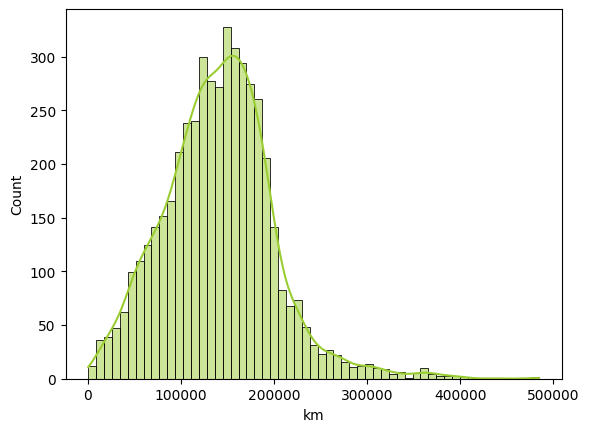

In [132]:
sns.histplot(data=df_AV, x="km", color="yellowgreen", kde=True)

Operación Realizada: se quitaron los outliers. Donde por el limite inferior se considero aquellos menores que 0 como registros erroneos y por encima aquellos registros por encima de 500.000 km, descartando en total 2 registros

#### POTENCIA

In [133]:
df_AV.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO,modelo_ag
0,140411.0,100.0,diesel,black,hatchback,1,1,0,1,0,1,0,11300.0,1,1,2018,Serie 1
1,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,1,2,2018,Serie M
2,183297.0,120.0,diesel,white,estate,0,0,0,1,0,1,0,10200.0,1,2,2018,Serie 3
3,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,25100.0,1,2,2018,Serie 4
4,97097.0,160.0,diesel,silver,coupe,1,1,0,0,1,1,1,33400.0,1,4,2018,Serie 4


In [134]:
df_AV['potencia'].max()

np.float64(423.0)

In [135]:
df_AV[df_AV['potencia']>350]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO,modelo_ag
3593,150187.0,412.0,petrol,white,sedan,1,1,1,1,1,1,1,41600.0,1,9,2018,Serie M
4138,2970.0,423.0,petrol,red,suv,1,1,1,0,0,1,1,82400.0,1,4,2018,Serie M


No se consideran Outliers por el limite superior

In [136]:
df_AV['potencia'].min()

np.float64(0.0)

In [137]:
df_AV[df_AV['potencia']==0]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO,modelo_ag
3757,81770.0,0.0,diesel,white,suv,0,0,0,0,0,0,0,11700.0,1,3,2018,Serie X


Al valor que tiene una potencia nulo, se le asignara la media de potencia para su modelo_ag, es decir la media de potencia para la categoria "Serie X"

In [138]:
media_sx=df_AV[df_AV['modelo_ag']=='Serie X']['potencia'].mean()

In [139]:
media_sx

np.float64(144.4453049370765)

In [140]:
df_AV.loc[df_AV['potencia'] == 0, 'potencia'] = media_sx

In [141]:
df_AV.loc[3757]

km                         81770.0
potencia                144.445305
tipo_gasolina               diesel
color                        white
tipo_coche                     suv
volante_regulable                0
aire_acondicionado               0
camara_trasera                   0
elevalunas_electrico             0
bluetooth                        0
gps                              0
alerta_lim_velocidad             0
precio                     11700.0
fecha_venta_DIA                  1
fecha_venta_MES                  3
fecha_venta_AÑO               2018
modelo_ag                  Serie X
Name: 3757, dtype: object

array([[<Axes: title={'center': 'potencia'}>]], dtype=object)

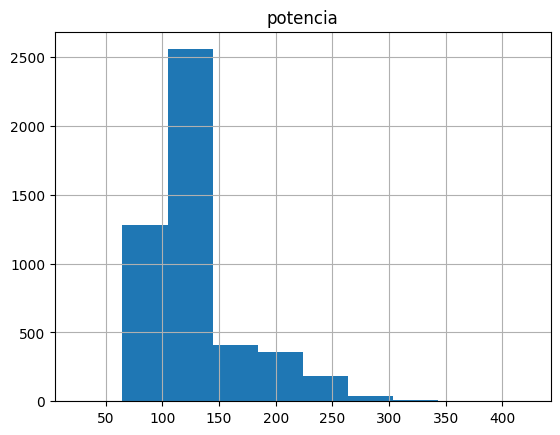

In [142]:
df_AV.hist('potencia')

Operación Realizada: no habian outliers, pero si un valor erroneo de potencia = 0 para un registro, al cual se le asigno la media de la potencia para su modelo_ag

#### TIPO GASOLINA

In [143]:
df_AV.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_DIA,fecha_venta_MES,fecha_venta_AÑO,modelo_ag
0,140411.0,100.0,diesel,black,hatchback,1,1,0,1,0,1,0,11300.0,1,1,2018,Serie 1
1,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,1,2,2018,Serie M
2,183297.0,120.0,diesel,white,estate,0,0,0,1,0,1,0,10200.0,1,2,2018,Serie 3
3,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,25100.0,1,2,2018,Serie 4
4,97097.0,160.0,diesel,silver,coupe,1,1,0,0,1,1,1,33400.0,1,4,2018,Serie 4


In [144]:
df_AV['tipo_gasolina'].value_counts()

tipo_gasolina
diesel           4624
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

In [145]:
df_AV=df_AV.replace('Diesel', 'diesel')

In [146]:
df_AV['tipo_gasolina'].value_counts()

tipo_gasolina
diesel           4629
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64

In [147]:
ValoresDistintosDiesel = df_AV['tipo_gasolina'].value_counts() < 200

lista_resultados = ValoresDistintosDiesel[ValoresDistintosDiesel].index.tolist()

print(lista_resultados)

['petrol', 'hybrid_petrol', 'electro']


In [148]:
for i in lista_resultados:
    df_AV.loc[df_AV['tipo_gasolina'] == i, 'tipo_gasolina'] = 'Otro'

In [149]:
df_AV['tipo_gasolina'].value_counts()

tipo_gasolina
diesel    4629
Otro       202
Name: count, dtype: int64

*Operación Realizada: Existian dos categorias "Diesel" y "diesel", por lo que se agruparon en una unica cateogria denominda "diesel", y luego se acumularon todos aquellos q no son diesel en una unica categoria llamada "Otro", ya que representan una poca cantidad de datos*

#### COLOR

In [150]:
df_AV['color'].value_counts()

color
black              1496
grey               1069
blue                644
white               483
Sin Informacion     443
brown               302
silver              290
red                  47
beige                37
green                14
orange                6
Name: count, dtype: int64

In [151]:
ValoresMenos50 = df_AV['color'].value_counts() < 50

lista_resultados = ValoresMenos50[ValoresMenos50].index.tolist()

print(lista_resultados)

['red', 'beige', 'green', 'orange']


In [152]:
for i in lista_resultados:
    df_AV.loc[df_AV['color'] == i, 'color'] = 'Otros'

In [153]:
df_AV['color'].value_counts()

color
black              1496
grey               1069
blue                644
white               483
Sin Informacion     443
brown               302
silver              290
Otros               104
Name: count, dtype: int64

*Operación Realizada: se agrupan todos aquellos colores que se repiten menos de 50 veces en el dataset, en una categoria denominada "otros"*

#### TIPO COCHE

In [154]:
df_AV['tipo_coche'].value_counts()

tipo_coche
estate         1817
suv            1059
sedan           954
hatchback       749
coupe            97
subcompact       77
convertible      39
van              39
Name: count, dtype: int64

In [155]:
ValoresMenos100 = df_AV['tipo_coche'].value_counts() < 100

lista_resultados_2 = ValoresMenos100[ValoresMenos100].index.tolist()

print(lista_resultados_2)

['coupe', 'subcompact', 'convertible', 'van']


In [156]:
for i in lista_resultados_2:
    df_AV.loc[df_AV['tipo_coche'] == i, 'tipo_coche'] = 'Otros'

In [157]:
df_AV['tipo_coche'].value_counts()

tipo_coche
estate       1817
suv          1059
sedan         954
hatchback     749
Otros         252
Name: count, dtype: int64

*Operación Realizada: se agrupan todos aquellos tipo_coche que se repiten menos de 100 veces en el dataset, en una categoria denominada "otros"*

#### VOLANTE REGULABLE

In [158]:
df_AV['volante_regulable'].value_counts()

volante_regulable
1    2659
0    2172
Name: count, dtype: int64

*Operación Realizada: varibale ok, no se realizan cambios*

#### AIRE ACONDICIONADO

In [159]:
df_AV['aire_acondicionado'].value_counts()

aire_acondicionado
1    3938
0     893
Name: count, dtype: int64

*Operación Realizada: varibale ok, no se realizan cambios*

#### CAMARA TRASERA

In [160]:
df_AV['camara_trasera'].value_counts()

camara_trasera
0    3858
1     973
Name: count, dtype: int64

*Operación Realizada: varibale ok, no se realizan cambios*

#### ELEVALUNAS ELECTRICO

In [161]:
df_AV['elevalunas_electrico'].value_counts()

elevalunas_electrico
0    2606
1    2225
Name: count, dtype: int64

*Operación Realizada: varibale ok, no se realizan cambios*

#### BLUETOOTH

In [162]:
df_AV['bluetooth'].value_counts()

bluetooth
0    3807
1    1024
Name: count, dtype: int64

*Operación Realizada: varibale ok, no se realizan cambios*

#### GPS

In [163]:
df_AV['gps'].value_counts()

gps
1    4503
0     328
Name: count, dtype: int64

*Operación Realizada: varibale ok, no se realizan cambios*

#### ALERTA LIM VELOCIDAD

In [164]:
df_AV['alerta_lim_velocidad'].value_counts()

alerta_lim_velocidad
1    2690
0    2141
Name: count, dtype: int64

*Operación Realizada: varibale ok, no se realizan cambios*

#### FECHA VENTA DIA

In [165]:
df_AV['fecha_venta_DIA'].value_counts()

fecha_venta_DIA
1    4831
Name: count, dtype: int64

*Operación Realizada: la fecha indica solamente el mes de la venta, por lo que el dia siempre es el primero de cada mes. Se elimina esta columna ya que no aporta información*

In [166]:
del(df_AV['fecha_venta_DIA'])

#### FECHA VENTA MES

In [167]:
df_AV['fecha_venta_MES'].value_counts()

fecha_venta_MES
5    808
3    734
4    692
6    603
7    537
8    527
2    500
9    222
1    208
Name: count, dtype: int64

<Axes: xlabel='fecha_venta_MES', ylabel='Count'>

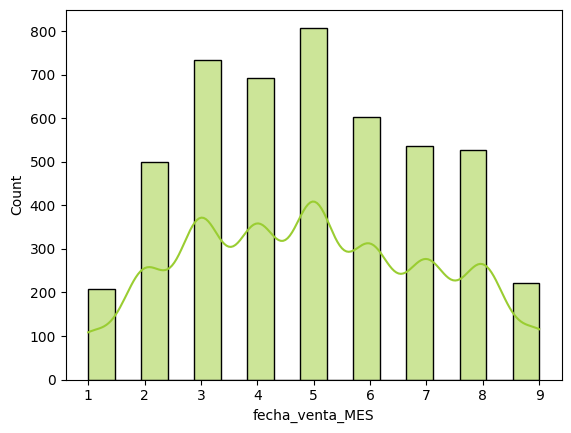

In [168]:
sns.histplot(data=df_AV, x="fecha_venta_MES", color="yellowgreen", kde=True)

*Operación Realizada: Si bien la variable tiene una distrubción extraña debido a que no existen valores de los meses 10,11 y 12, se opta por dejarla y evaluarla luego en el análisis de correlación*

#### FECHA VENTA AÑO

In [169]:
df_AV['fecha_venta_AÑO'].value_counts()

fecha_venta_AÑO
2018    4827
2007       1
2010       1
2009       1
2008       1
Name: count, dtype: int64

In [170]:
del(df_AV['fecha_venta_AÑO'])

*Operación Realizada: Los valores distintos a 2018 son considerados errores, por lo que se asume que el dataset describe solo ventas realizadas en el año 2018. Esta columna no aporta información por lo que sera descartada*

________________________________________________________________________________________________________________________________________

<a id="7"></a>
### Análisis de la Variable Objetivo

In [171]:
df_AVO=df_AV.copy()

In [172]:
df_AVO.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4831 entries, 0 to 4832
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4831 non-null   float64
 1   potencia              4831 non-null   float64
 2   tipo_gasolina         4831 non-null   object 
 3   color                 4831 non-null   object 
 4   tipo_coche            4831 non-null   object 
 5   volante_regulable     4831 non-null   int64  
 6   aire_acondicionado    4831 non-null   int64  
 7   camara_trasera        4831 non-null   int64  
 8   elevalunas_electrico  4831 non-null   int64  
 9   bluetooth             4831 non-null   int64  
 10  gps                   4831 non-null   int64  
 11  alerta_lim_velocidad  4831 non-null   int64  
 12  precio                4831 non-null   float64
 13  fecha_venta_MES       4831 non-null   int32  
 14  modelo_ag             4831 non-null   object 
dtypes: float64(3), int32(1), i

#### Precio

<Axes: xlabel='precio', ylabel='Count'>

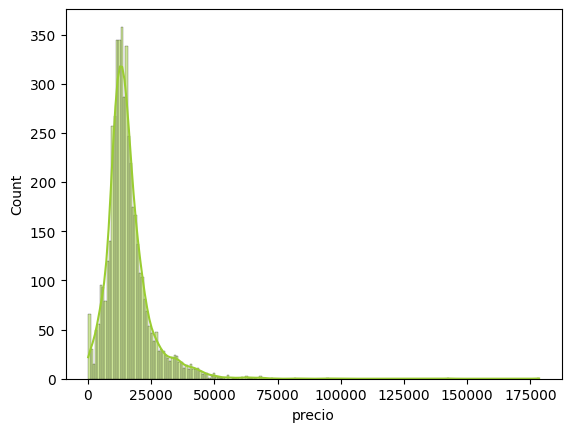

In [173]:
sns.histplot(data=df_AVO, x="precio", color="yellowgreen", kde=True)

In [174]:
df_AVO[df_AVO['precio']>100000]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta_MES,modelo_ag
4676,103222.0,140.0,diesel,grey,suv,1,1,0,1,0,1,1,142800.0,8,Serie X
4745,72515.0,135.0,diesel,blue,suv,0,0,1,0,0,0,1,178500.0,8,Serie X


In [175]:
len(df_AVO[df_AVO['precio']<500])

15

In [176]:
df_AVO.drop(df_AV[(df_AVO['precio']<500)|(df_AVO['precio']>100000)].index,inplace=True)

*Operación Realizada: Se consideran como outliers:
 - los valores por encima de 100000 que incluye únicamente 2 registros,
 - los valores por debajo de 500 que son 15 registros.


<Axes: xlabel='precio', ylabel='Count'>

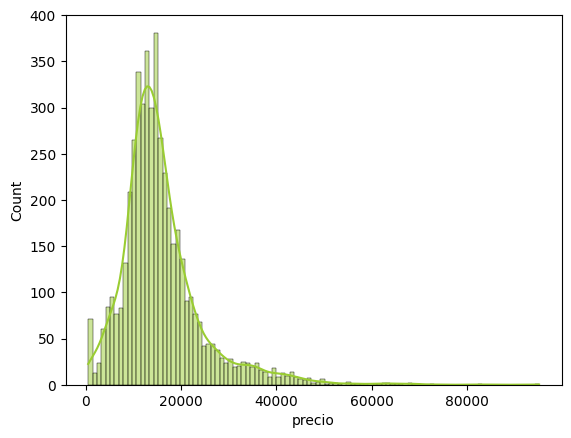

In [177]:
sns.histplot(data=df_AVO, x="precio", color="yellowgreen", kde=True)

In [178]:
df_AVO["log_precio"]=np.log10(df_AVO["precio"])

<Axes: xlabel='log_precio', ylabel='Count'>

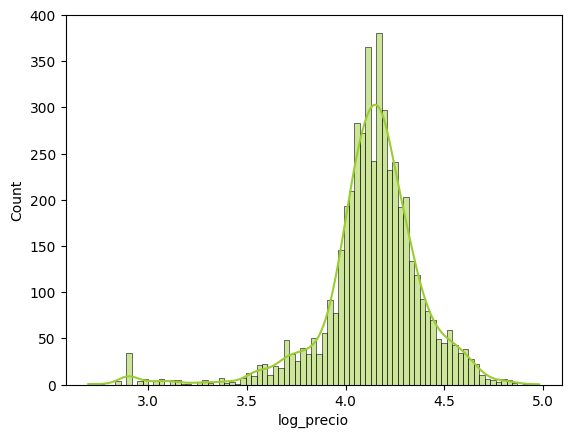

In [179]:
sns.histplot(data=df_AVO, x="log_precio", color="yellowgreen", kde=True)

array([[<Axes: title={'center': 'log_precio'}>]], dtype=object)

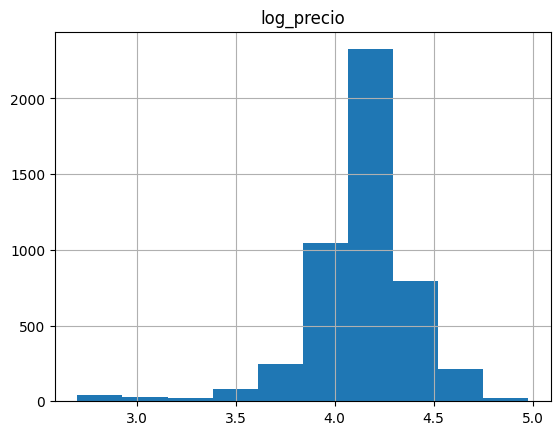

In [180]:
df_AVO.hist('log_precio')

In [181]:
del(df_AVO['precio'])

*Operación Realizada: se utilizo la funcion logaritmo generando la variable log_precio, la cual tiene una distribución con mas similitud a una distribución normal que la variable precio, por lo que se descarta esta ultima ya que aportan la misma información*

_________________________________________________________________________________________________________

<a id="8"></a>
### Análisis de Correlación

In [182]:
df_AC=df_AVO.copy()

In [183]:
corr = df_AVO.corr(numeric_only = True)

In [184]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,fecha_venta_MES,log_precio
km,1.000000,-0.044224,0.070723,0.029815,0.003052,0.051908,-0.032859,0.156912,-0.017062,-0.004286,-0.442102
potencia,-0.044224,1.000000,0.326108,0.179367,0.313943,0.340308,0.227502,0.006796,0.505627,-0.027687,0.533215
volante_regulable,0.070723,0.326108,1.000000,0.285586,0.254274,0.277393,0.132726,0.242999,0.244545,0.081270,0.253244
aire_acondicionado,0.029815,0.179367,0.285586,1.000000,0.143470,0.256167,0.102311,0.343695,0.205548,0.006939,0.313941
camara_trasera,0.003052,0.313943,0.254274,0.143470,1.000000,0.199184,0.133402,0.062712,0.196162,0.020790,0.207258
elevalunas_electrico,0.051908,0.340308,0.277393,0.256167,0.199184,1.000000,0.236588,0.202149,0.337653,-0.021801,0.328438
bluetooth,-0.032859,0.227502,0.132726,0.102311,0.133402,0.236588,1.000000,0.117344,0.097809,-0.013516,0.199398
gps,0.156912,0.006796,0.242999,0.343695,0.062712,0.202149,0.117344,1.000000,-0.051004,0.062574,0.043860
alerta_lim_velocidad,-0.017062,0.505627,0.244545,0.205548,0.196162,0.337653,0.097809,-0.051004,1.000000,-0.041593,0.431820
fecha_venta_MES,-0.004286,-0.027687,0.081270,0.006939,0.020790,-0.021801,-0.013516,0.062574,-0.041593,1.000000,0.003487


#### Variables vs Target

##### KM

<Axes: xlabel='km', ylabel='log_precio'>

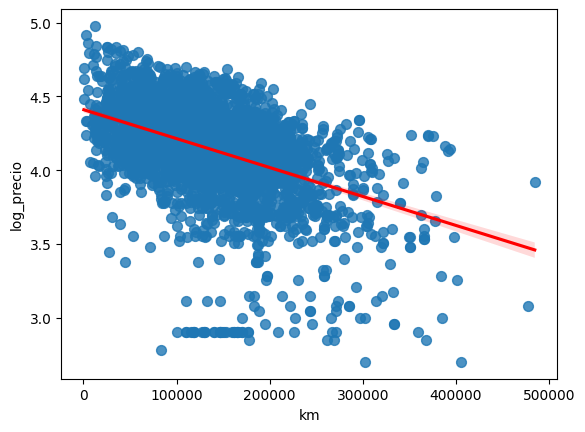

In [185]:
sns.regplot(x="km", y="log_precio", data=df_AC, scatter_kws={'s': 50}, line_kws={'color': 'red'})

*Existe una cierta correlación logica entre las variables, donde a mayor cantidad de km, menor es el precio*

##### Potencia

<Axes: xlabel='potencia', ylabel='log_precio'>

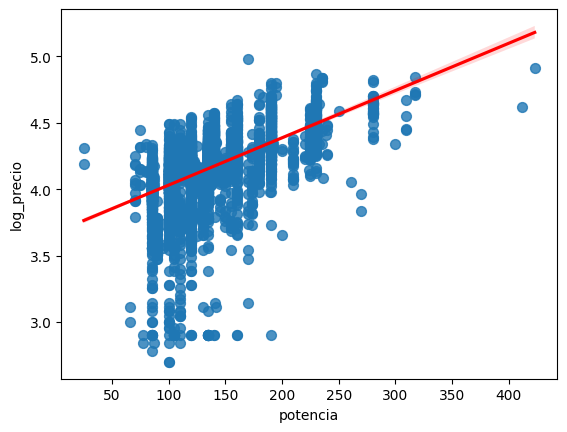

In [186]:
sns.regplot(x="potencia", y="log_precio", data=df_AC, scatter_kws={'s': 50}, line_kws={'color': 'red'})

*Existe una cierta correlación logica entre las variables, donde a mayor potencia, mayor es el precio*

##### Volante Regulable

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\342051208.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="volante_regulable",y="log_precio", data=df_AC, palette="plasma")


<Axes: xlabel='volante_regulable', ylabel='log_precio'>

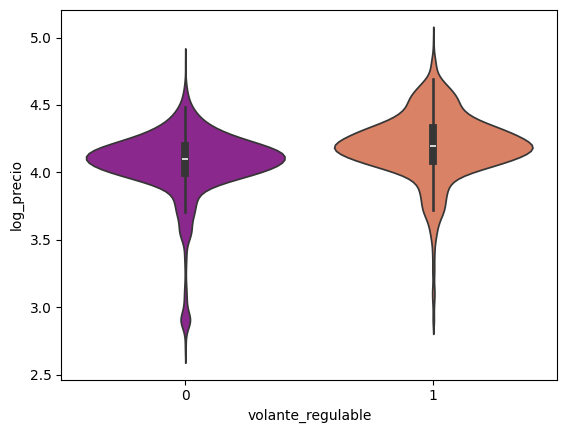

In [187]:
sns.violinplot(x="volante_regulable",y="log_precio", data=df_AC, palette="plasma")

*Se observa brevemente que si el coche cuenta con volante regulable, se puede esperar un precio superior*

##### Aire Acondiconado

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\3629900137.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="aire_acondicionado",y="log_precio", data=df_AC, palette="plasma")


<Axes: xlabel='aire_acondicionado', ylabel='log_precio'>

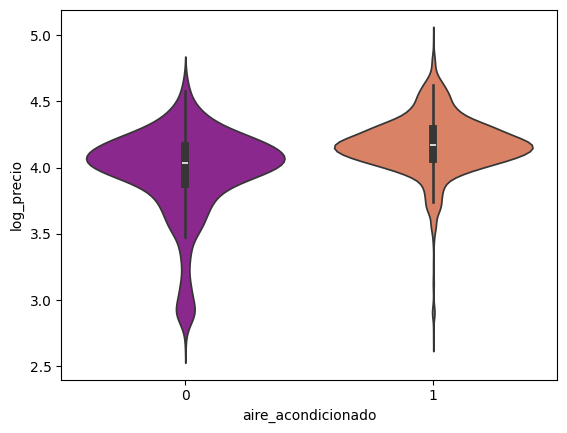

In [188]:
sns.violinplot(x="aire_acondicionado",y="log_precio", data=df_AC, palette="plasma")

*Se observa brevemente que si el coche cuenta con aire acondicionado, se puede esperar un precio superior*

##### Camara Trasera

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\2165367462.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="camara_trasera",y="log_precio", data=df_AC, palette="plasma")


<Axes: xlabel='camara_trasera', ylabel='log_precio'>

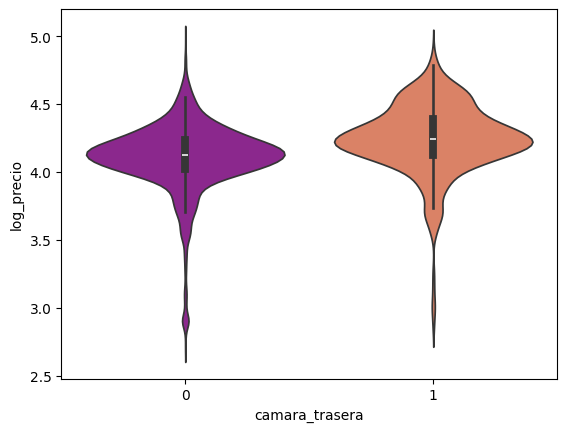

In [189]:
sns.violinplot(x="camara_trasera",y="log_precio", data=df_AC, palette="plasma")

*Se observa brevemente que si el coche cuenta con camara trasera, se puede esperar un precio superior*

##### Elevalunas Electrico

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\3353836267.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="elevalunas_electrico",y="log_precio", data=df_AC, palette="plasma")


<Axes: xlabel='elevalunas_electrico', ylabel='log_precio'>

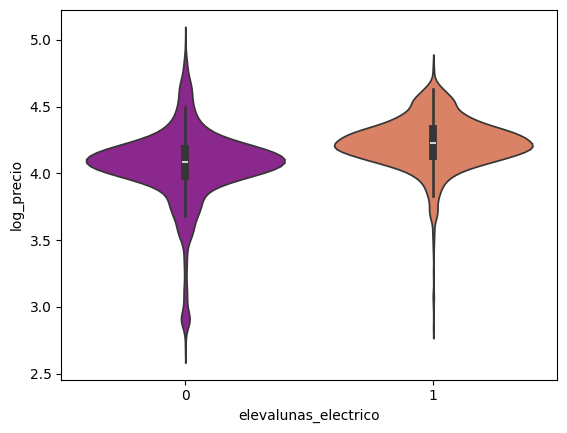

In [190]:
sns.violinplot(x="elevalunas_electrico",y="log_precio", data=df_AC, palette="plasma")

*Se observa brevemente que si el coche cuenta con elevalunas_electrico, se puede esperar un precio superior*

##### Bluetooth

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\1362041110.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="bluetooth",y="log_precio", data=df_AC, palette="plasma")


<Axes: xlabel='bluetooth', ylabel='log_precio'>

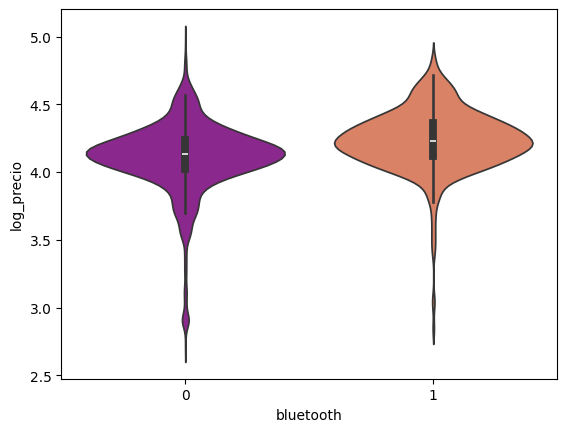

In [191]:
sns.violinplot(x="bluetooth",y="log_precio", data=df_AC, palette="plasma")

*Se observa brevemente que si el coche cuenta con bluethoot, se puede esperar un precio superior*

##### GPS

In [192]:
df_AC['gps'].value_counts()

gps
1    4490
0     324
Name: count, dtype: int64

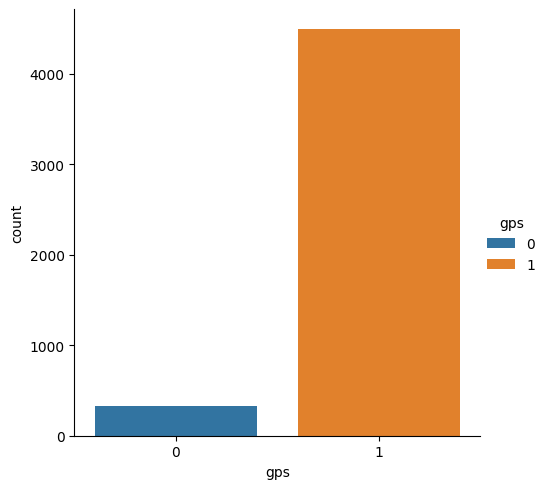

In [193]:
sns.catplot(data=df_AC,x="gps",kind="count",hue="gps")

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\3286218506.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="gps",y="log_precio", data=df_AC, palette="plasma")


<Axes: xlabel='gps', ylabel='log_precio'>

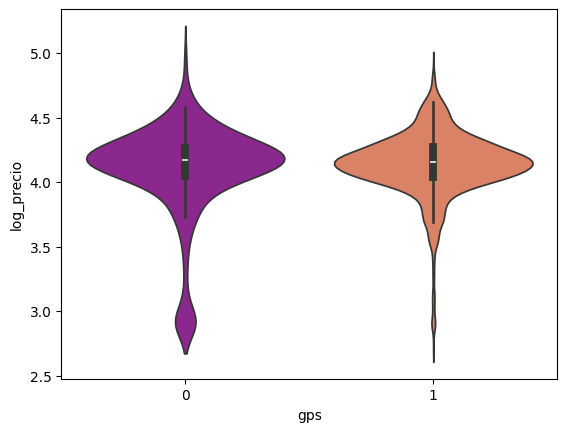

In [194]:
sns.violinplot(x="gps",y="log_precio", data=df_AC, palette="plasma")

*La variable gps, tiene casi nula correlación con el precio del vehiculo. Por lo tanto la variable GPS será descartada, ya que no aportaria información de valor al modelo*

In [195]:
del(df_AC['gps'])

##### Alerta Lim Velocidad

C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\3933035234.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="alerta_lim_velocidad",y="log_precio", data=df_AC, palette="plasma")


<Axes: xlabel='alerta_lim_velocidad', ylabel='log_precio'>

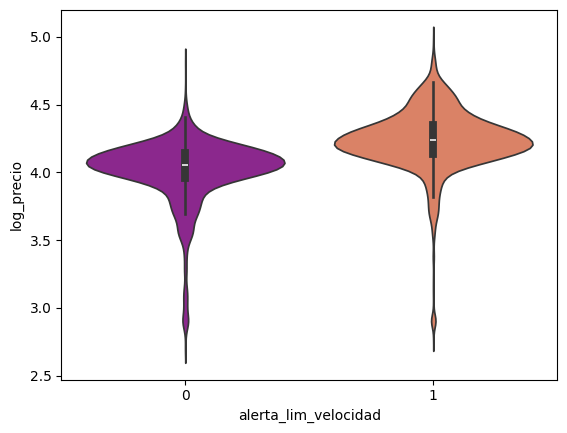

In [196]:
sns.violinplot(x="alerta_lim_velocidad",y="log_precio", data=df_AC, palette="plasma")

*Se observa brevemente que si el coche cuenta con alerta de limite de velocidad, se puede esperar un precio superior*

##### Fecha Venta_MES

<Axes: xlabel='fecha_venta_MES', ylabel='log_precio'>

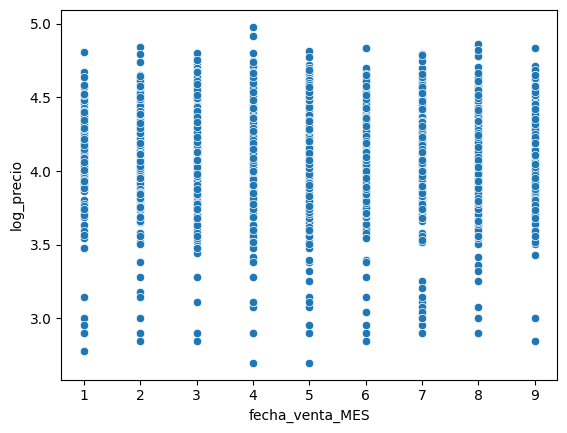

In [197]:
sns.scatterplot(x="fecha_venta_MES", y="log_precio",data=df_AC)


In [198]:
graf=df_AC.groupby('fecha_venta_MES')['log_precio'].mean().reset_index()

In [199]:
graf

,fecha_venta_MES,log_precio
0,1,4.099717
1,2,4.139328
2,3,4.137684
3,4,4.136483
4,5,4.144901
5,6,4.123739
6,7,4.127182
7,8,4.147463
8,9,4.120685


C:\Users\Usuario de Windows\AppData\Local\Temp\ipykernel_16300\2996046326.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=graf,x="fecha_venta_MES",y="log_precio", palette="plasma")


<Axes: xlabel='fecha_venta_MES', ylabel='log_precio'>

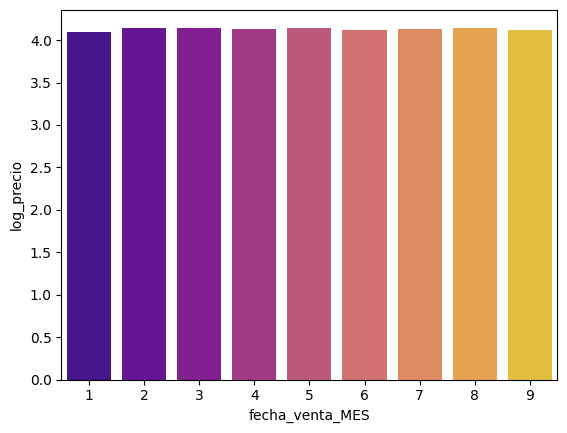

In [200]:
sns.barplot(data=graf,x="fecha_venta_MES",y="log_precio", palette="plasma")

*La variable fecha_venta_MES, tiene casi nula correlación con el precio del vehiculo. Por lo tanto la variable fecha_venta_MES será descartada,ya que no aportaria información de valor al modelo*

In [201]:
del(df_AC['fecha_venta_MES'])

_________________________________________________________________________________________________________

<a id="9"></a>
### Transformación de categóricas a numéricas

In [202]:
df_TC=df_AC.copy()

In [203]:
df_TC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4814 entries, 0 to 4832
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4814 non-null   float64
 1   potencia              4814 non-null   float64
 2   tipo_gasolina         4814 non-null   object 
 3   color                 4814 non-null   object 
 4   tipo_coche            4814 non-null   object 
 5   volante_regulable     4814 non-null   int64  
 6   aire_acondicionado    4814 non-null   int64  
 7   camara_trasera        4814 non-null   int64  
 8   elevalunas_electrico  4814 non-null   int64  
 9   bluetooth             4814 non-null   int64  
 10  alerta_lim_velocidad  4814 non-null   int64  
 11  modelo_ag             4814 non-null   object 
 12  log_precio            4814 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 526.5+ KB


In [204]:
target= ["log_precio"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [205]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_TC)

In [206]:
print(lista_numericas)

['km', 'potencia']


In [207]:
print(lista_boolean)

['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'alerta_lim_velocidad']


In [208]:
print(lista_categoricas)

['tipo_gasolina', 'color', 'tipo_coche', 'modelo_ag']


#### Tipo Gasolina  / color / tipo_coche / modelo_ag

In [209]:
df_TC=pd.get_dummies(data=df_TC, columns=lista_categoricas,dtype=int)

In [210]:
df_TC.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,log_precio,tipo_gasolina_Otro,...,modelo_ag_Otro,modelo_ag_Serie 1,modelo_ag_Serie 2,modelo_ag_Serie 3,modelo_ag_Serie 4,modelo_ag_Serie 5,modelo_ag_Serie 6,modelo_ag_Serie 7,modelo_ag_Serie M,modelo_ag_Serie X
0,140411.0,100.0,1,1,0,1,0,0,4.053078,0,...,0,1,0,0,0,0,0,0,0,0
1,13929.0,317.0,1,1,0,0,1,1,4.843233,1,...,0,0,0,0,0,0,0,0,1,0
2,183297.0,120.0,0,0,0,1,0,0,4.008600,0,...,0,0,0,1,0,0,0,0,0,0
3,128035.0,135.0,1,1,0,1,1,1,4.399674,0,...,0,0,0,0,1,0,0,0,0,0
4,97097.0,160.0,1,1,0,0,1,1,4.523746,0,...,0,0,0,0,1,0,0,0,0,0


Se aplica One Hot Encoding para todas las variables de tipo Categoricas

#### km / potencia

In [211]:
MMS=MinMaxScaler()

In [212]:
df_TC[lista_numericas]=MMS.fit_transform(df_TC[lista_numericas])

In [213]:
df_TC.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,log_precio,tipo_gasolina_Otro,...,modelo_ag_Otro,modelo_ag_Serie 1,modelo_ag_Serie 2,modelo_ag_Serie 3,modelo_ag_Serie 4,modelo_ag_Serie 5,modelo_ag_Serie 6,modelo_ag_Serie 7,modelo_ag_Serie M,modelo_ag_Serie X
0,0.289039,0.188442,1,1,0,1,0,0,4.053078,0,...,0,1,0,0,0,0,0,0,0,0
1,0.027787,0.733668,1,1,0,0,1,1,4.843233,1,...,0,0,0,0,0,0,0,0,1,0
2,0.377621,0.238693,0,0,0,1,0,0,4.008600,0,...,0,0,0,1,0,0,0,0,0,0
3,0.263476,0.276382,1,1,0,1,1,1,4.399674,0,...,0,0,0,0,1,0,0,0,0,0
4,0.199573,0.339196,1,1,0,0,1,1,4.523746,0,...,0,0,0,0,1,0,0,0,0,0


Se aplica Min Max Scaler a las variables de tipo numerica: KM y Potencia.

_________________________________________________________________________________________________________

<a id="10"></a>
### Analisis de Correlacion Final

In [214]:
df_ACF=df_TC.copy()

In [215]:
corr = df_ACF.corr(numeric_only = True)

In [216]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,log_precio,tipo_gasolina_Otro,tipo_gasolina_diesel,color_Otros,color_Sin Informacion,color_black,color_blue,color_brown,color_grey,color_silver,color_white,tipo_coche_Otros,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_suv,modelo_ag_Otro,modelo_ag_Serie 1,modelo_ag_Serie 2,modelo_ag_Serie 3,modelo_ag_Serie 4,modelo_ag_Serie 5,modelo_ag_Serie 6,modelo_ag_Serie 7,modelo_ag_Serie M,modelo_ag_Serie X
km,1.000000,-0.044224,0.070723,0.029815,0.003052,0.051908,-0.032859,-0.017062,-0.442102,-0.051918,0.051918,-0.014144,0.000332,0.038526,-0.021436,-0.020544,0.026889,0.023087,-0.067435,-0.127854,0.189336,-0.118344,0.065477,-0.112127,-0.082173,-0.122542,-0.093295,0.122395,-0.101603,0.165238,-0.031638,0.002567,-0.060489,-0.104559
potencia,-0.044224,1.000000,0.326108,0.179367,0.313943,0.340308,0.227502,0.505627,0.533215,0.123942,-0.123942,-0.021998,-0.004104,0.030779,-0.009877,-0.055088,0.004045,0.013047,0.006941,0.003720,-0.056519,-0.234505,0.034007,0.236768,0.018788,-0.323386,-0.023813,-0.281509,0.038133,0.196434,0.131589,0.192532,0.336518,0.206785
volante_regulable,0.070723,0.326108,1.000000,0.285586,0.254274,0.277393,0.132726,0.244545,0.253244,-0.005861,0.005861,-0.032693,-0.025065,0.025134,0.012863,0.038550,0.051166,-0.015669,-0.102879,-0.030071,0.014124,-0.170287,0.049330,0.101321,0.016269,-0.244106,-0.051960,-0.190558,0.011677,0.260382,0.045060,0.092041,0.076177,0.090368
aire_acondicionado,0.029815,0.179367,0.285586,1.000000,0.143470,0.256167,0.102311,0.205548,0.313941,-0.079390,0.079390,-0.032852,-0.044671,0.040578,0.003701,0.047474,0.024228,-0.036454,-0.050922,-0.102917,0.091238,-0.119432,0.063519,-0.007890,0.050853,-0.210652,-0.007943,-0.046321,-0.019048,0.183167,0.002190,0.050515,0.030138,-0.015516
camara_trasera,0.003052,0.313943,0.254274,0.143470,1.000000,0.199184,0.133402,0.196162,0.207258,0.012641,-0.012641,-0.028404,-0.032214,0.021334,0.000170,-0.016896,0.016188,-0.000198,0.003068,-0.034467,-0.042838,-0.051263,0.003626,0.110088,0.037679,-0.103506,-0.012470,-0.152936,-0.021676,0.082367,0.057924,0.128332,0.084093,0.094983
elevalunas_electrico,0.051908,0.340308,0.277393,0.256167,0.199184,1.000000,0.236588,0.337653,0.328438,0.004495,-0.004495,-0.037269,-0.010909,0.079593,-0.035546,-0.021299,-0.018098,-0.031506,0.013220,-0.026783,0.050374,-0.098062,0.009882,0.031801,0.031803,-0.189524,-0.019996,-0.160089,0.075131,0.237923,0.020566,0.055689,0.024037,0.031074
bluetooth,-0.032859,0.227502,0.132726,0.102311,0.133402,0.236588,1.000000,0.097809,0.199398,0.032308,-0.032308,0.010048,-0.013737,0.023744,0.006099,-0.048649,-0.032705,-0.015542,0.061678,0.073834,-0.033546,0.016661,-0.013596,-0.001993,0.059302,-0.019509,0.003285,-0.048477,0.119745,-0.010233,0.045274,-0.031264,0.122972,-0.014970
alerta_lim_velocidad,-0.017062,0.505627,0.244545,0.205548,0.196162,0.337653,0.097809,1.000000,0.431820,0.002465,-0.002465,-0.025655,-0.021165,0.041666,-0.023257,-0.029643,0.001336,0.015178,0.004968,-0.073868,0.020702,-0.204978,0.046312,0.150464,0.054271,-0.332894,-0.010346,-0.195520,0.026946,0.251031,0.027817,0.095004,0.083092,0.141100
log_precio,-0.442102,0.533215,0.253244,0.313941,0.207258,0.328438,0.199398,0.431820,1.000000,-0.080439,0.080439,-0.023940,-0.015106,0.039011,-0.045919,0.019115,-0.011286,-0.053029,0.059981,0.004810,-0.182007,-0.101844,0.036700,0.264344,0.136477,-0.230265,0.010062,-0.307642,0.101147,0.100402,0.044252,0.105701,0.178740,0.241301
tipo_gasolina_Otro,-0.051918,0.123942,-0.005861,-0.079390,0.012641,0.004495,0.032308,0.002465,-0.080439,1.000000,-1.000000,0.033740,0.010020,0.005244,-0.016653,-0.032206,0.007373,0.000417,0.000261,0.171393,-0.066398,0.029033,0.030994,-0.069730,0.028494,0.038406,0.040410,-0.001042,0.029474,-0.029878,0.052398,0.007607,0.126505,-0.070171


In [217]:
Corr_Altas=[]
for i in corr.index:
    for j in corr.columns:
        if i != j and (corr.loc[i, j] > 0.7 or corr.loc[i, j] < -0.7) and (j, i) not in Corr_Altas:
            Corr_Altas.append((i, j))

In [218]:
print(Corr_Altas)

[('tipo_gasolina_Otro', 'tipo_gasolina_diesel'), ('tipo_coche_suv', 'modelo_ag_Serie X')]


In [219]:
df_AC['tipo_gasolina'].value_counts()

tipo_gasolina
diesel    4615
Otro       199
Name: count, dtype: int64

*Debido a que la variable tipo_gasolina tiene solo dos valores posibles, diesel u otro, estas aportan la misma información, por lo que se dejara unicamente tipo_gasolina_diesel.*

In [220]:
del(df_ACF['tipo_gasolina_Otro'])


Finalmente se eliminara la variable:  	
- modelo_ag_Serie X: Ya que tiene alta correlación con los tipos de coches suv, por lo que esta variable esta aportando información repetida. Concluimos que si es tipo de coche suv, tambien sera modelo serie x  			

In [221]:
del(df_ACF['modelo_ag_Serie X'])

In [222]:
corr = df_ACF.corr(numeric_only = True)

In [223]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,log_precio,tipo_gasolina_diesel,color_Otros,color_Sin Informacion,color_black,color_blue,color_brown,color_grey,color_silver,color_white,tipo_coche_Otros,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_suv,modelo_ag_Otro,modelo_ag_Serie 1,modelo_ag_Serie 2,modelo_ag_Serie 3,modelo_ag_Serie 4,modelo_ag_Serie 5,modelo_ag_Serie 6,modelo_ag_Serie 7,modelo_ag_Serie M
km,1.000000,-0.044224,0.070723,0.029815,0.003052,0.051908,-0.032859,-0.017062,-0.442102,0.051918,-0.014144,0.000332,0.038526,-0.021436,-0.020544,0.026889,0.023087,-0.067435,-0.127854,0.189336,-0.118344,0.065477,-0.112127,-0.082173,-0.122542,-0.093295,0.122395,-0.101603,0.165238,-0.031638,0.002567,-0.060489
potencia,-0.044224,1.000000,0.326108,0.179367,0.313943,0.340308,0.227502,0.505627,0.533215,-0.123942,-0.021998,-0.004104,0.030779,-0.009877,-0.055088,0.004045,0.013047,0.006941,0.003720,-0.056519,-0.234505,0.034007,0.236768,0.018788,-0.323386,-0.023813,-0.281509,0.038133,0.196434,0.131589,0.192532,0.336518
volante_regulable,0.070723,0.326108,1.000000,0.285586,0.254274,0.277393,0.132726,0.244545,0.253244,0.005861,-0.032693,-0.025065,0.025134,0.012863,0.038550,0.051166,-0.015669,-0.102879,-0.030071,0.014124,-0.170287,0.049330,0.101321,0.016269,-0.244106,-0.051960,-0.190558,0.011677,0.260382,0.045060,0.092041,0.076177
aire_acondicionado,0.029815,0.179367,0.285586,1.000000,0.143470,0.256167,0.102311,0.205548,0.313941,0.079390,-0.032852,-0.044671,0.040578,0.003701,0.047474,0.024228,-0.036454,-0.050922,-0.102917,0.091238,-0.119432,0.063519,-0.007890,0.050853,-0.210652,-0.007943,-0.046321,-0.019048,0.183167,0.002190,0.050515,0.030138
camara_trasera,0.003052,0.313943,0.254274,0.143470,1.000000,0.199184,0.133402,0.196162,0.207258,-0.012641,-0.028404,-0.032214,0.021334,0.000170,-0.016896,0.016188,-0.000198,0.003068,-0.034467,-0.042838,-0.051263,0.003626,0.110088,0.037679,-0.103506,-0.012470,-0.152936,-0.021676,0.082367,0.057924,0.128332,0.084093
elevalunas_electrico,0.051908,0.340308,0.277393,0.256167,0.199184,1.000000,0.236588,0.337653,0.328438,-0.004495,-0.037269,-0.010909,0.079593,-0.035546,-0.021299,-0.018098,-0.031506,0.013220,-0.026783,0.050374,-0.098062,0.009882,0.031801,0.031803,-0.189524,-0.019996,-0.160089,0.075131,0.237923,0.020566,0.055689,0.024037
bluetooth,-0.032859,0.227502,0.132726,0.102311,0.133402,0.236588,1.000000,0.097809,0.199398,-0.032308,0.010048,-0.013737,0.023744,0.006099,-0.048649,-0.032705,-0.015542,0.061678,0.073834,-0.033546,0.016661,-0.013596,-0.001993,0.059302,-0.019509,0.003285,-0.048477,0.119745,-0.010233,0.045274,-0.031264,0.122972
alerta_lim_velocidad,-0.017062,0.505627,0.244545,0.205548,0.196162,0.337653,0.097809,1.000000,0.431820,-0.002465,-0.025655,-0.021165,0.041666,-0.023257,-0.029643,0.001336,0.015178,0.004968,-0.073868,0.020702,-0.204978,0.046312,0.150464,0.054271,-0.332894,-0.010346,-0.195520,0.026946,0.251031,0.027817,0.095004,0.083092
log_precio,-0.442102,0.533215,0.253244,0.313941,0.207258,0.328438,0.199398,0.431820,1.000000,0.080439,-0.023940,-0.015106,0.039011,-0.045919,0.019115,-0.011286,-0.053029,0.059981,0.004810,-0.182007,-0.101844,0.036700,0.264344,0.136477,-0.230265,0.010062,-0.307642,0.101147,0.100402,0.044252,0.105701,0.178740
tipo_gasolina_diesel,0.051918,-0.123942,0.005861,0.079390,-0.012641,-0.004495,-0.032308,-0.002465,0.080439,1.000000,-0.033740,-0.010020,-0.005244,0.016653,0.032206,-0.007373,-0.000417,-0.000261,-0.171393,0.066398,-0.029033,-0.030994,0.069730,-0.028494,-0.038406,-0.040410,0.001042,-0.029474,0.029878,-0.052398,-0.007607,-0.126505


In [224]:
Corr_Altas=[]
for i in corr.index:
    for j in corr.columns:
        if i != j and (corr.loc[i, j] > 0.7 or corr.loc[i, j] < -0.7) and (j, i) not in Corr_Altas:
            Corr_Altas.append((i, j))

In [225]:
print(Corr_Altas)

[]


In [226]:
df_ACF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4814 entries, 0 to 4832
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   km                     4814 non-null   float64
 1   potencia               4814 non-null   float64
 2   volante_regulable      4814 non-null   int64  
 3   aire_acondicionado     4814 non-null   int64  
 4   camara_trasera         4814 non-null   int64  
 5   elevalunas_electrico   4814 non-null   int64  
 6   bluetooth              4814 non-null   int64  
 7   alerta_lim_velocidad   4814 non-null   int64  
 8   log_precio             4814 non-null   float64
 9   tipo_gasolina_diesel   4814 non-null   int64  
 10  color_Otros            4814 non-null   int64  
 11  color_Sin Informacion  4814 non-null   int64  
 12  color_black            4814 non-null   int64  
 13  color_blue             4814 non-null   int64  
 14  color_brown            4814 non-null   int64  
 15  color_gre

In [227]:
df_ACF.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,log_precio,tipo_gasolina_diesel,...,tipo_coche_suv,modelo_ag_Otro,modelo_ag_Serie 1,modelo_ag_Serie 2,modelo_ag_Serie 3,modelo_ag_Serie 4,modelo_ag_Serie 5,modelo_ag_Serie 6,modelo_ag_Serie 7,modelo_ag_Serie M
0,0.289039,0.188442,1,1,0,1,0,0,4.053078,1,...,0,0,1,0,0,0,0,0,0,0
1,0.027787,0.733668,1,1,0,0,1,1,4.843233,0,...,0,0,0,0,0,0,0,0,0,1
2,0.377621,0.238693,0,0,0,1,0,0,4.008600,1,...,0,0,0,0,1,0,0,0,0,0
3,0.263476,0.276382,1,1,0,1,1,1,4.399674,1,...,0,0,0,0,0,1,0,0,0,0
4,0.199573,0.339196,1,1,0,0,1,1,4.523746,1,...,0,0,0,0,0,1,0,0,0,0


In [228]:
#df_ACF.head(50).to_excel("Master_Data_Science_Entregable_1 (Santiago Ezequiel Velasco).xlsx")